In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

In [124]:
#Read the CSV file
df_liver = pd.read_csv('indian_liver_patient.csv')

In [125]:
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [126]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.70,0.10,187,16,18,6.80,3.30,0.90,1
1,62,Male,10.90,5.50,699,64,100,7.50,3.20,0.74,1
2,62,Male,7.30,4.10,490,60,68,7.00,3.30,0.89,1
3,58,Male,1.00,0.40,182,14,20,6.80,3.40,1.00,1
4,72,Male,3.90,2.00,195,27,59,7.30,2.40,0.40,1


In [127]:
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [128]:
df_liver = df_liver.dropna()

In [129]:
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [132]:
#Chaning the 'Dataset' values to 0 and 1
df_liver['Dataset'] = df_liver['Dataset'].map({1: 0, 2: 1})

In [133]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.70,0.10,187,16,18,6.80,3.30,0.90,0
1,62,Male,10.90,5.50,699,64,100,7.50,3.20,0.74,0
2,62,Male,7.30,4.10,490,60,68,7.00,3.30,0.89,0
3,58,Male,1.00,0.40,182,14,20,6.80,3.40,1.00,0
4,72,Male,3.90,2.00,195,27,59,7.30,2.40,0.40,0


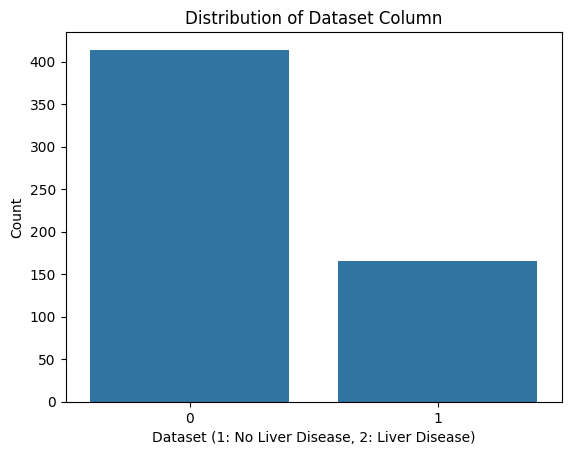

In [134]:
#Plot the distribution of the 'Dataset' column
sns.countplot(x='Dataset', data=df_liver)
plt.title('Distribution of Dataset Column')
plt.xlabel('Dataset (1: No Liver Disease, 2: Liver Disease)')
plt.ylabel('Count')
plt.show()

In [135]:
#Write the preprocessed data to a new CSV file
df_liver.to_csv('liver_disease_preprocessed.csv', index=False)

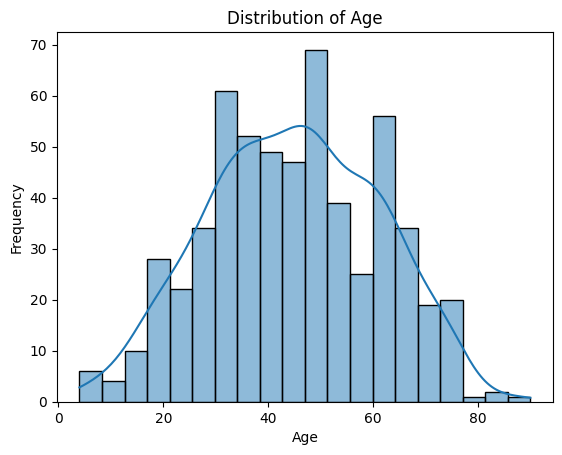

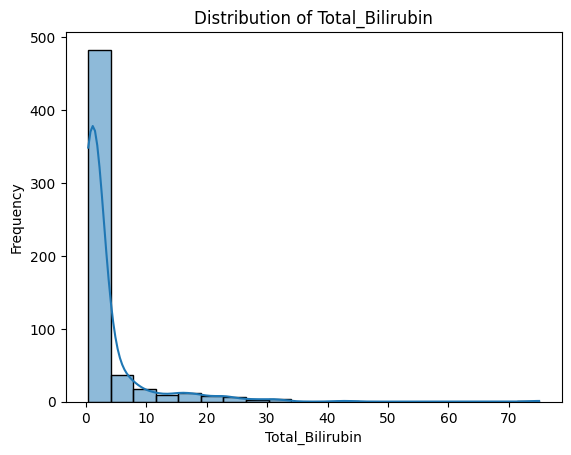

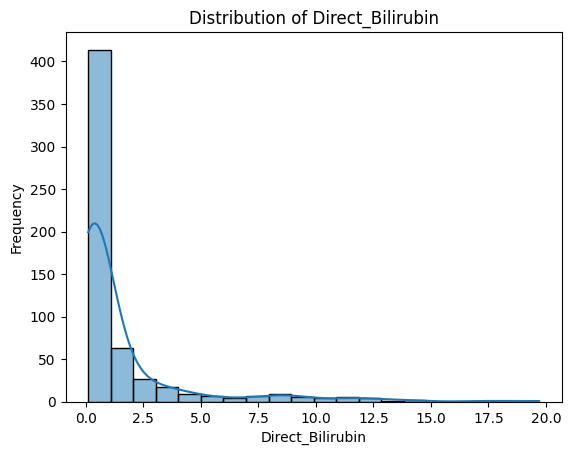

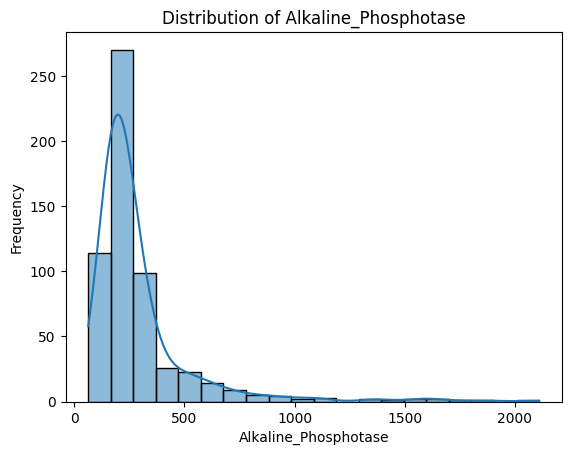

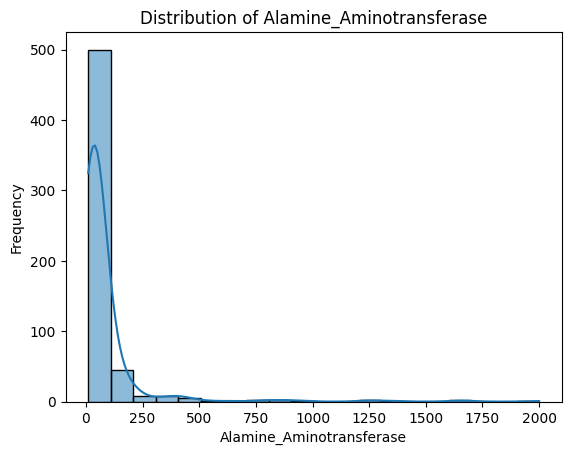

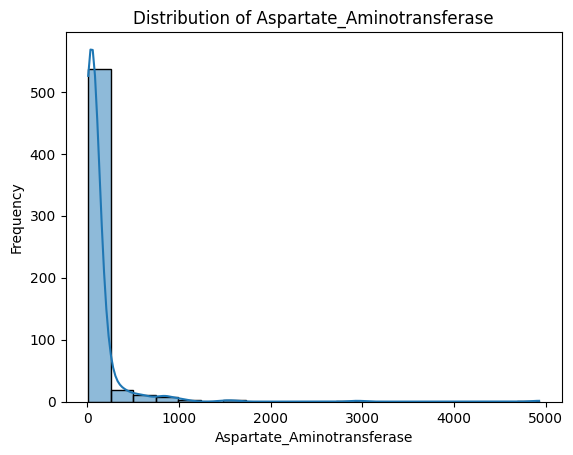

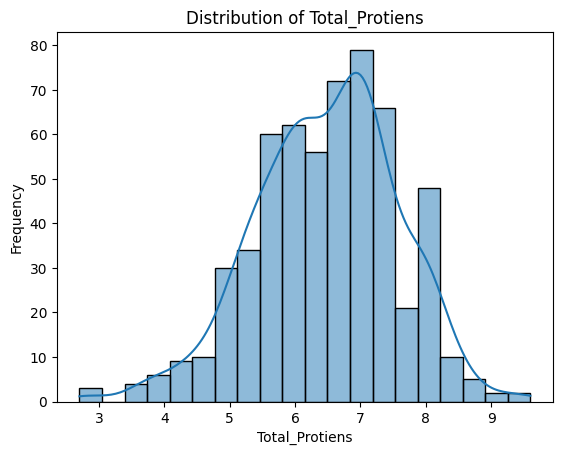

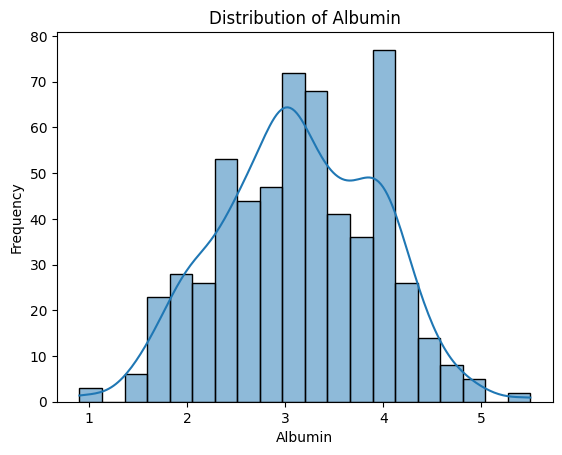

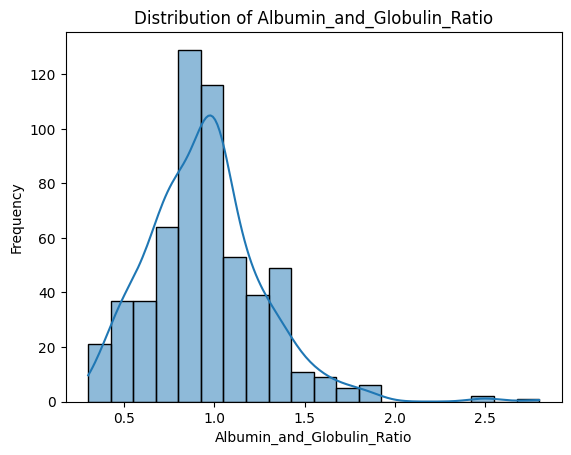

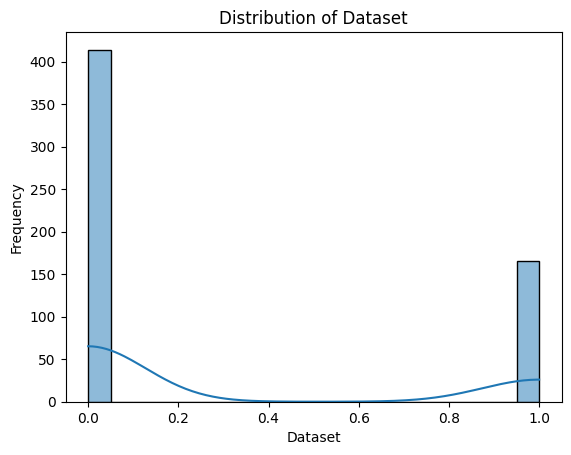

In [136]:
#Distrinution of all numerical features
numerical_features = df_liver.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    sns.histplot(df_liver[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

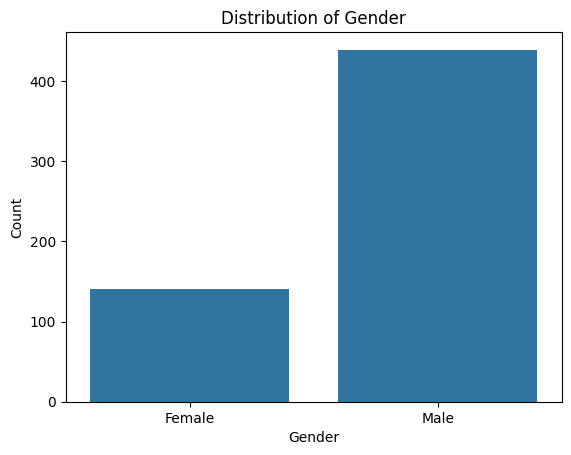

In [137]:
#Distribution of non-numerical features
categorical_features = df_liver.select_dtypes(include=[object]).columns.tolist()
for feature in categorical_features:
    sns.countplot(x=feature, data=df_liver)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

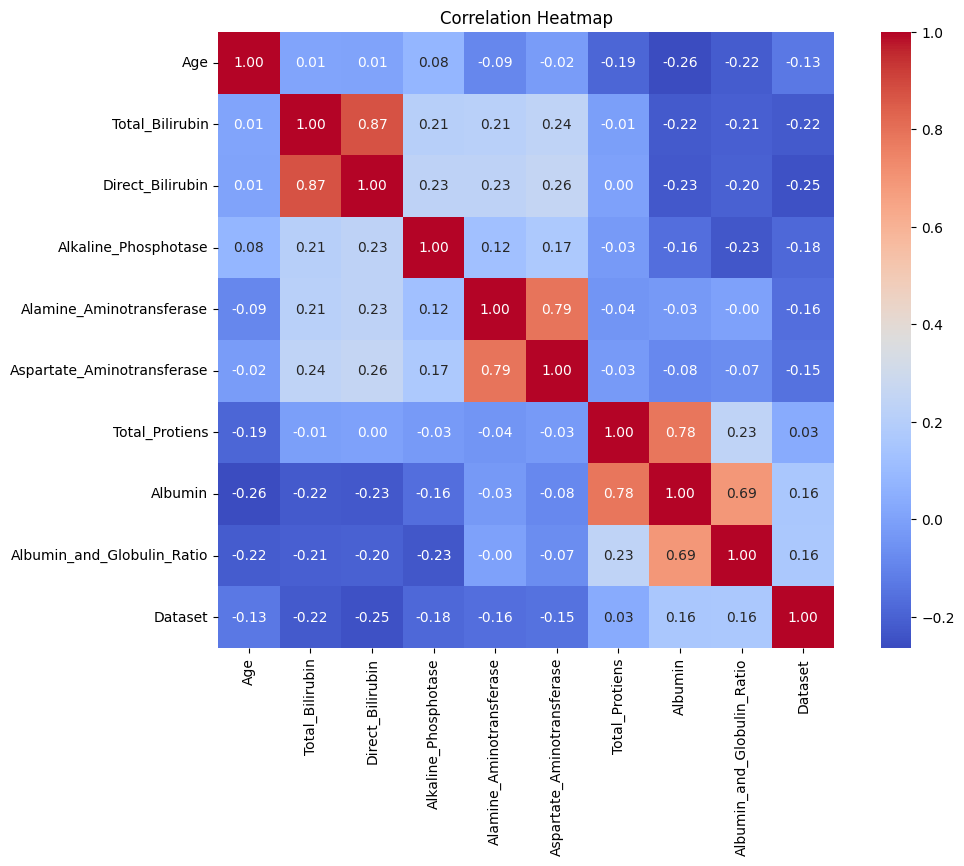

In [138]:
#Heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_liver[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [139]:
#Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_liver[feature] = label_encoder.fit_transform(df_liver[feature])



In [140]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.70,0.10,187,16,18,6.80,3.30,0.90,0
1,62,1,10.90,5.50,699,64,100,7.50,3.20,0.74,0
2,62,1,7.30,4.10,490,60,68,7.00,3.30,0.89,0
3,58,1,1.00,0.40,182,14,20,6.80,3.40,1.00,0
4,72,1,3.90,2.00,195,27,59,7.30,2.40,0.40,0


In [147]:
#Create Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_liver.drop('Dataset', axis=1)
y = df_liver['Dataset']


#Handle class imbalance date using undresampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=30)
X_resampled, y_resampled = rus.fit_resample(X, y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=35)




In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       124

 

In [146]:
#Save the model
joblib.dump(model, 'liver_disease_model.pkl')

['liver_disease_model.pkl']